In [1]:
# Para no tener que hacer restart con cada actualizacion 

%load_ext autoreload
%autoreload 2



# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = "{:,.2f}".format    #para la notación
pd.set_option("display.max_columns", None)
import pickle

from itertools import product, combinations

from sklearn.neighbors import LocalOutlierFactor # para detectar outliers usando el método LOF
from sklearn.ensemble import IsolationForest # para detectar outliers usando el metodo IF
import tqdm as tqdm
from scipy.stats import chi2_contingency
import os
import sys 
sys.path.append(os.path.abspath("../../src"))   
import Soporte_ajuste_modelos as f

# Para tratar el problema de desbalance
# -----------------------------------------------------------------------
# from imblearn.over_sampling import RandomOverSampler, SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.combine import SMOTETomek


from sklearn.model_selection import train_test_split,GridSearchCV
# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve


from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pickle

from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
import os 
import sys




pd.options.display.float_format = "{:,.2f}".format    #para la notación
pd.set_option("display.max_columns", None)

C:\Users\jaime\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_preprocesado=pd.read_pickle("../../datos/datos3/datos_out_balanced.pkl").reset_index(drop=True)

## GRADIENT

### Modelo A

In [3]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.8)
modelos_clasificacion.ajustar_modelo("gradient_boosting", param_grid=None, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos3/basura",nombre_modelo_guardar="modelo_gradient3.pkl")

-------------------------------------------------
El mejor modelo es:
GradientBoostingClassifier(learning_rate=0.2, max_depth=5, min_samples_split=5,
                           random_state=42, subsample=0.8)
-------------------------------------------------
Los parametros actuales son:


{'n_estimators': [100, 200],
 'learning_rate': [0.01, 0.1, 0.2],
 'max_depth': [3, 4, 5],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'subsample': [0.8, 1.0]}

In [4]:
modelos_clasificacion.calcular_metricas(modelo_nombre="gradient_boosting").T

accuracy  precision  recall   f1  kappa  auc
train      1.00       1.00    1.00 1.00   1.00 1.00
test       0.89       0.90    0.89 0.89   0.77 0.91

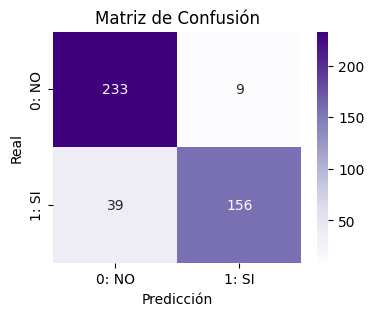

In [5]:
modelos_clasificacion.plot_matriz_confusion("gradient_boosting", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

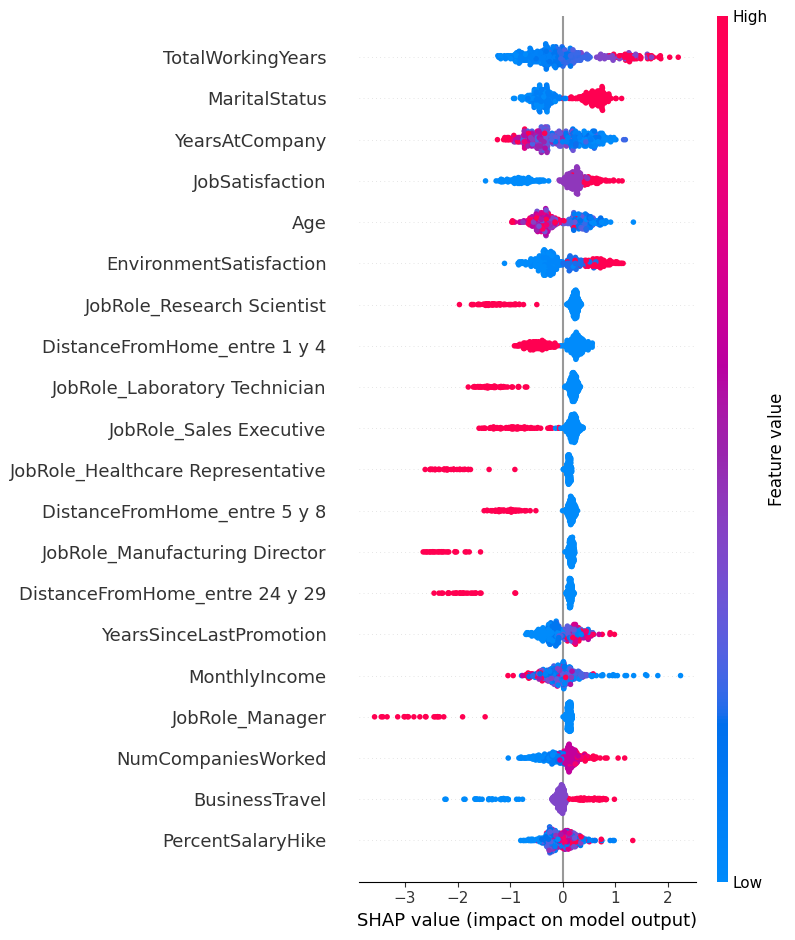

In [6]:
modelos_clasificacion.plot_shap_summary("gradient_boosting")

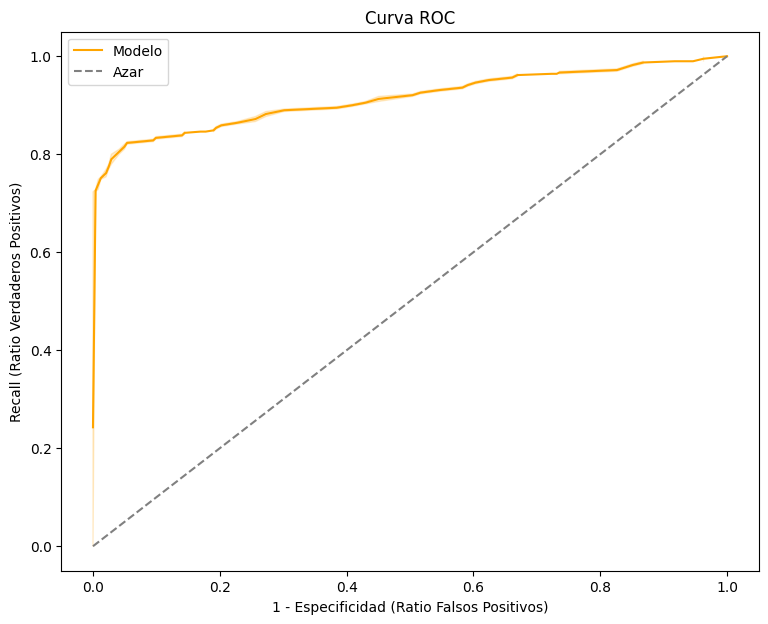

In [7]:
modelos_clasificacion.plot_curva_ROC( grafica_size = (9,7))

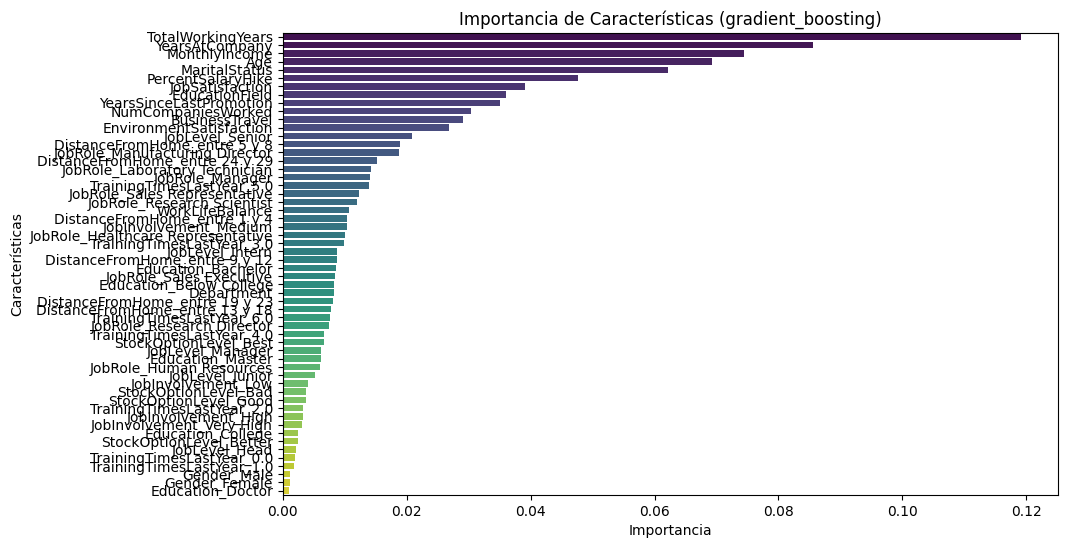

In [8]:
modelos_clasificacion.importancia_predictores("gradient_boosting")

### Modelo A.7


In [9]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.7)
modelos_clasificacion.ajustar_modelo("gradient_boosting", param_grid=None, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos3/basura",nombre_modelo_guardar="modelo_gradient3.7.pkl")

-------------------------------------------------
El mejor modelo es:
GradientBoostingClassifier(learning_rate=0.2, max_depth=4, min_samples_leaf=2,
                           min_samples_split=10, n_estimators=200,
                           random_state=42)
-------------------------------------------------
Los parametros actuales son:


{'n_estimators': [100, 200],
 'learning_rate': [0.01, 0.1, 0.2],
 'max_depth': [3, 4, 5],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'subsample': [0.8, 1.0]}

In [10]:
modelos_clasificacion.calcular_metricas(modelo_nombre="gradient_boosting").T

accuracy  precision  recall   f1  kappa  auc
train      1.00       1.00    1.00 1.00   1.00 1.00
test       0.88       0.88    0.88 0.88   0.76 0.93

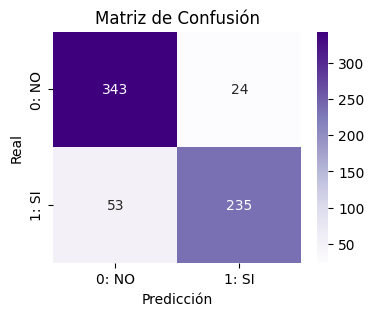

In [11]:
modelos_clasificacion.plot_matriz_confusion("gradient_boosting", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

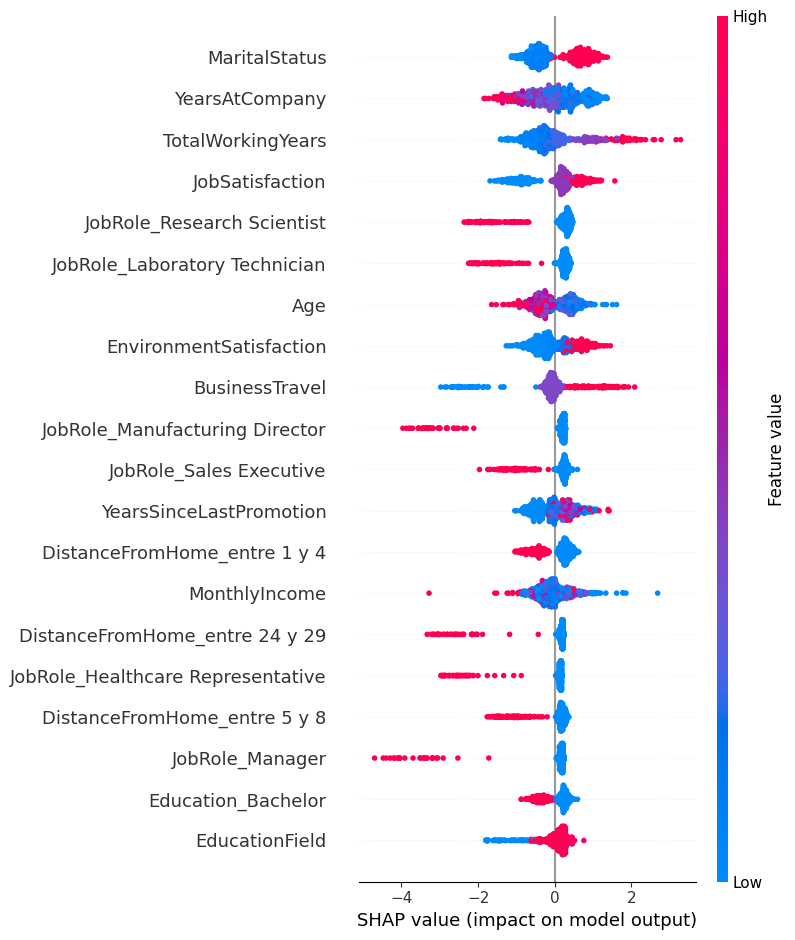

In [12]:
modelos_clasificacion.plot_shap_summary("gradient_boosting")

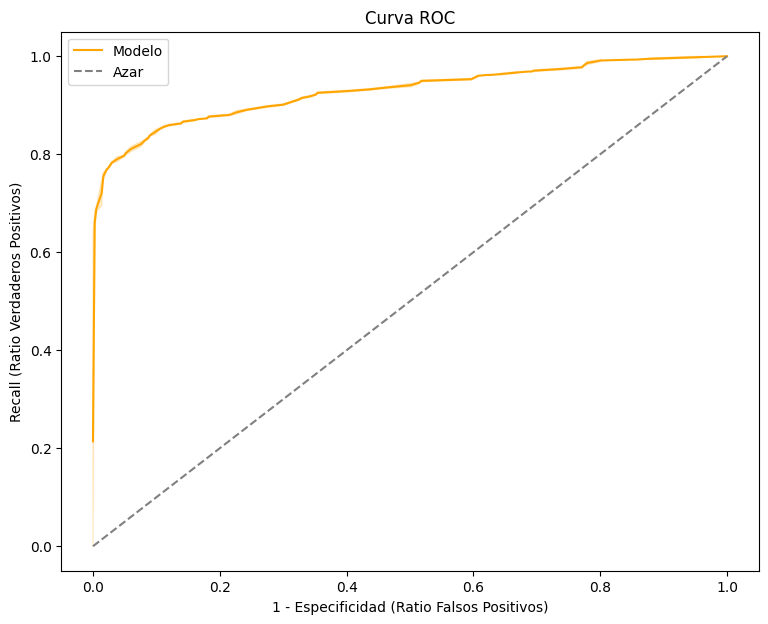

In [13]:
modelos_clasificacion.plot_curva_ROC( grafica_size = (9,7))

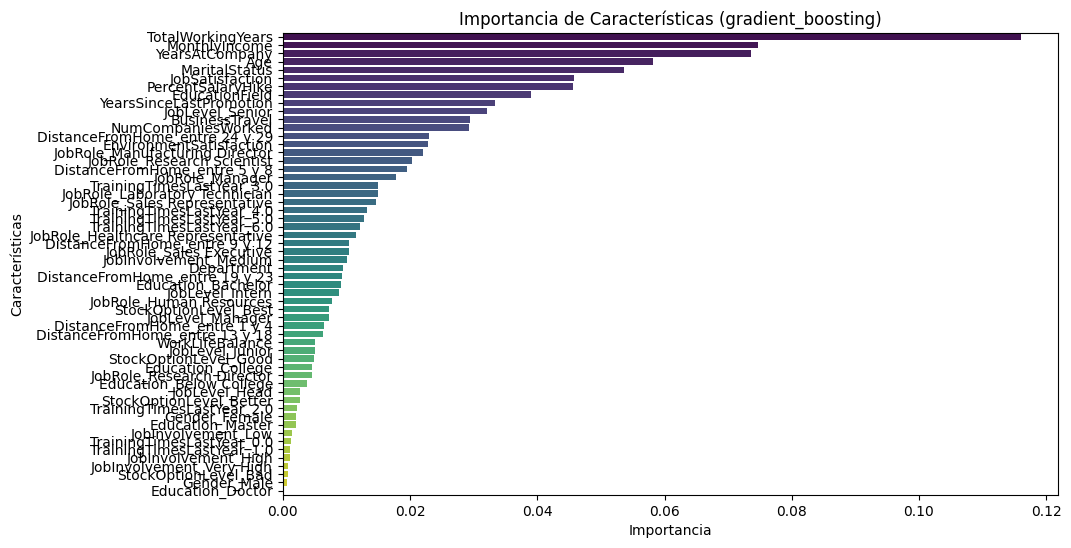

In [14]:
modelos_clasificacion.importancia_predictores("gradient_boosting")

### Toco parametros


## GRADIENT

### Modelo B

In [15]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.8)
modelos_clasificacion.ajustar_modelo("gradient_boosting", param_grid={'n_estimators': [150, 200,250],
 'learning_rate': [0.01, 0.5, 0.1],
 'max_depth': [3, 4, 5,6],
 'min_samples_split': [4, 5, 7,10],
 'min_samples_leaf': [1, 2, 4,5],
 'subsample': [0.8, 1.0]}, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos3/basura",nombre_modelo_guardar="modelo_gradient3B.pkl")

-------------------------------------------------
El mejor modelo es:
GradientBoostingClassifier(learning_rate=0.5, min_samples_leaf=5,
                           min_samples_split=4, n_estimators=200,
                           random_state=42)
-------------------------------------------------
Los parametros actuales son:


{'n_estimators': [100, 200],
 'learning_rate': [0.01, 0.1, 0.2],
 'max_depth': [3, 4, 5],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'subsample': [0.8, 1.0]}

In [16]:
modelos_clasificacion.calcular_metricas(modelo_nombre="gradient_boosting").T

accuracy  precision  recall   f1  kappa  auc
train      1.00       1.00    1.00 1.00   1.00 1.00
test       0.88       0.88    0.88 0.88   0.75 0.91

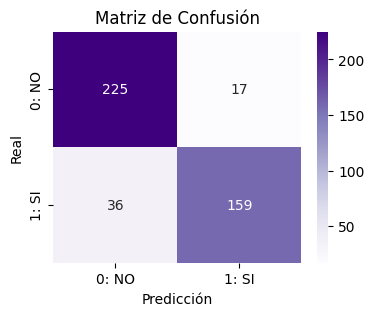

In [17]:
modelos_clasificacion.plot_matriz_confusion("gradient_boosting", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

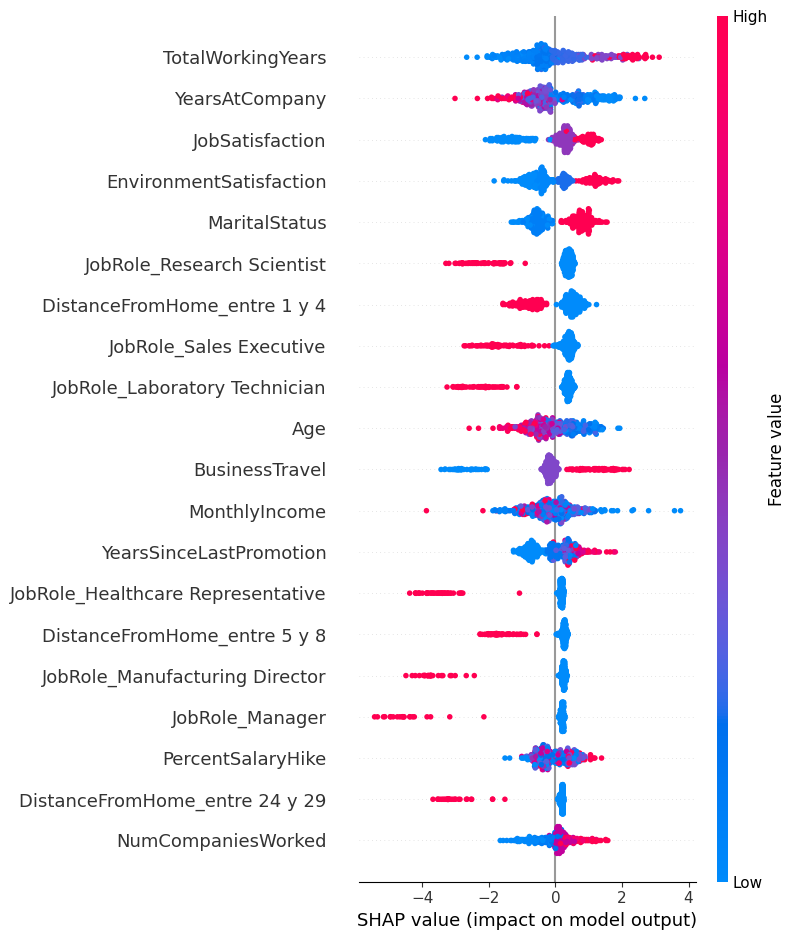

In [18]:
modelos_clasificacion.plot_shap_summary("gradient_boosting")

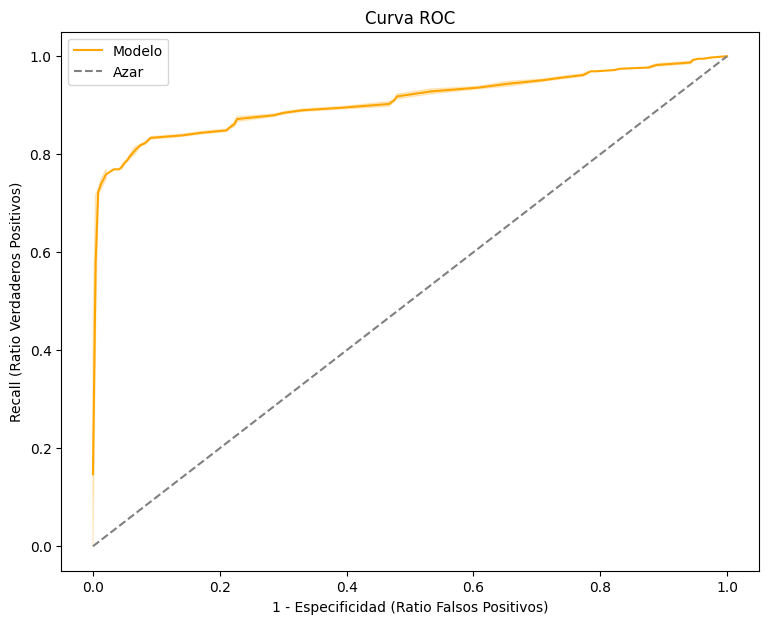

In [19]:
modelos_clasificacion.plot_curva_ROC( grafica_size = (9,7))

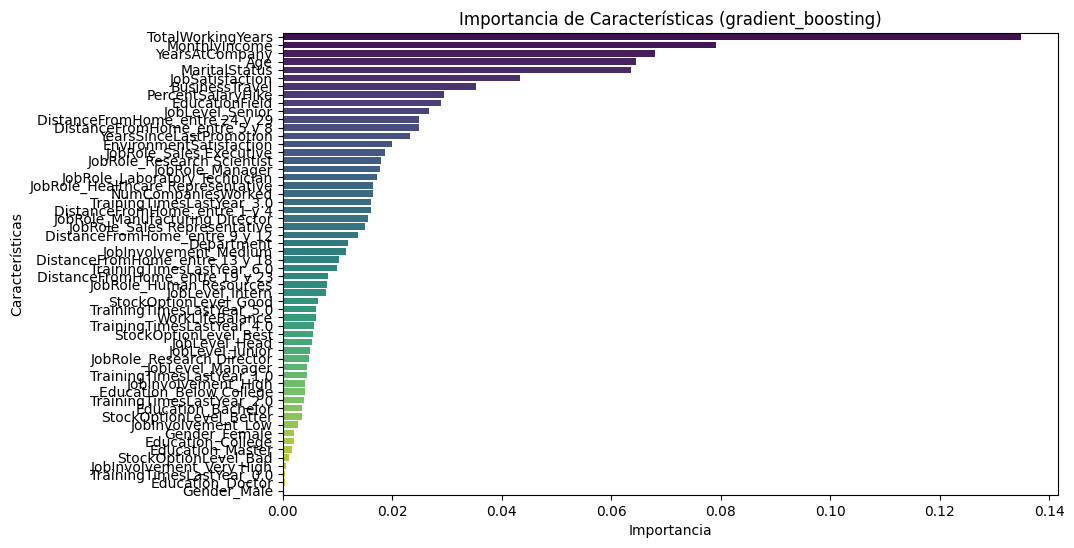

In [20]:
modelos_clasificacion.importancia_predictores("gradient_boosting")

### Modelo B.7


In [21]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.7)
modelos_clasificacion.ajustar_modelo("gradient_boosting", param_grid={'n_estimators': [150, 200,250],
 'learning_rate': [0.01, 0.05, 0.1],
 'max_depth': [3, 4, 5,6],
 'min_samples_split': [4, 5, 7,10],
 'min_samples_leaf': [1, 2, 4,5],
 'subsample': [0.8, 1.0]}, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos3/basura",nombre_modelo_guardar="modelo_gradient3.B.7.pkl")

-------------------------------------------------
El mejor modelo es:
GradientBoostingClassifier(learning_rate=0.05, max_depth=6,
                           min_samples_split=10, n_estimators=150,
                           random_state=42)
-------------------------------------------------
Los parametros actuales son:


{'n_estimators': [100, 200],
 'learning_rate': [0.01, 0.1, 0.2],
 'max_depth': [3, 4, 5],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'subsample': [0.8, 1.0]}

In [22]:
modelos_clasificacion.calcular_metricas(modelo_nombre="gradient_boosting").T

accuracy  precision  recall   f1  kappa  auc
train      1.00       1.00    1.00 1.00   1.00 1.00
test       0.89       0.89    0.89 0.89   0.77 0.94

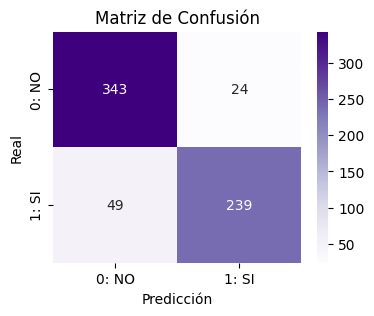

In [23]:
modelos_clasificacion.plot_matriz_confusion("gradient_boosting", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

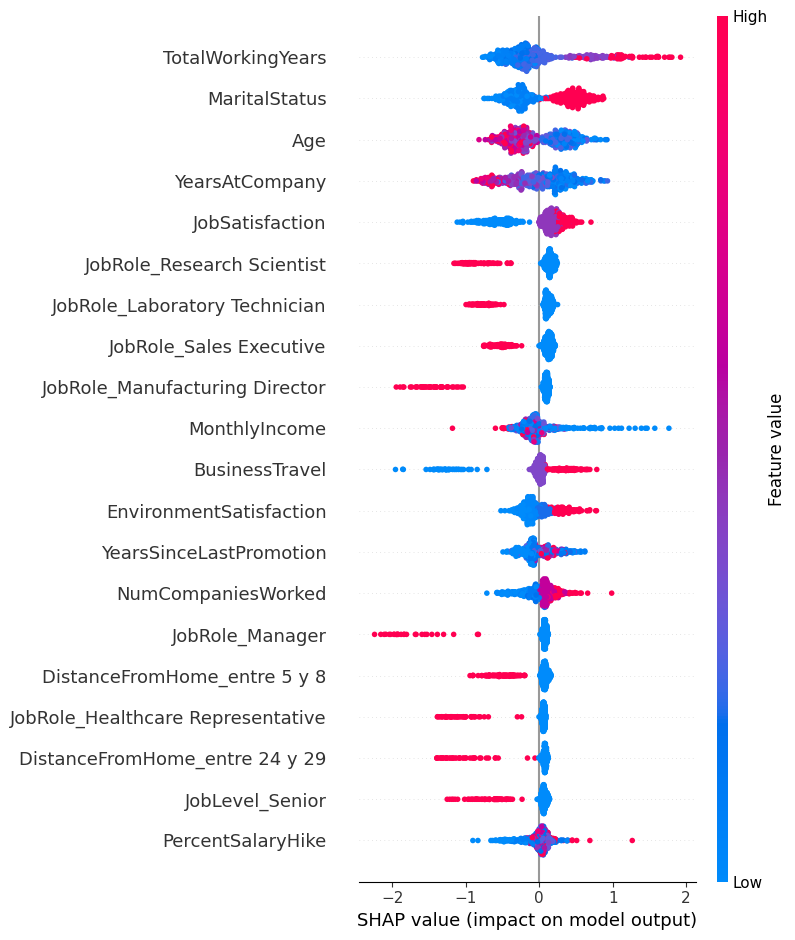

In [24]:
modelos_clasificacion.plot_shap_summary("gradient_boosting")

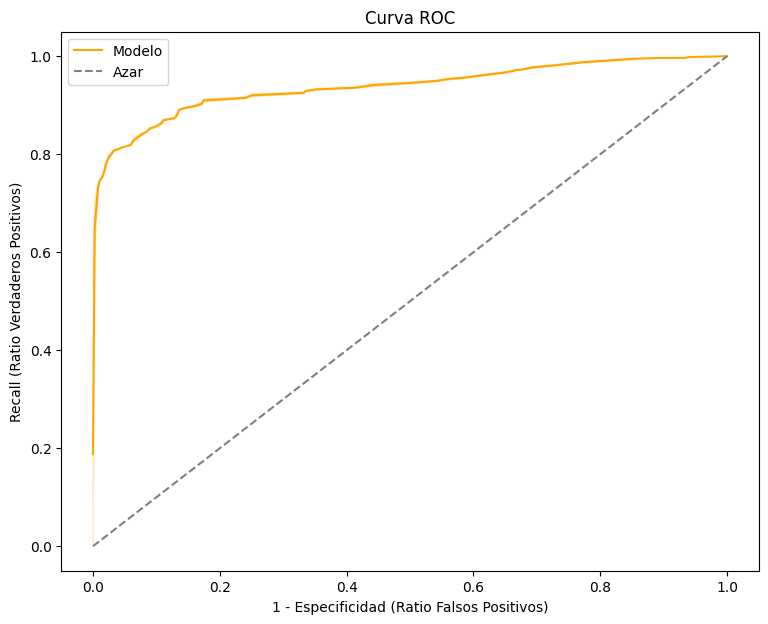

In [25]:
modelos_clasificacion.plot_curva_ROC( grafica_size = (9,7))

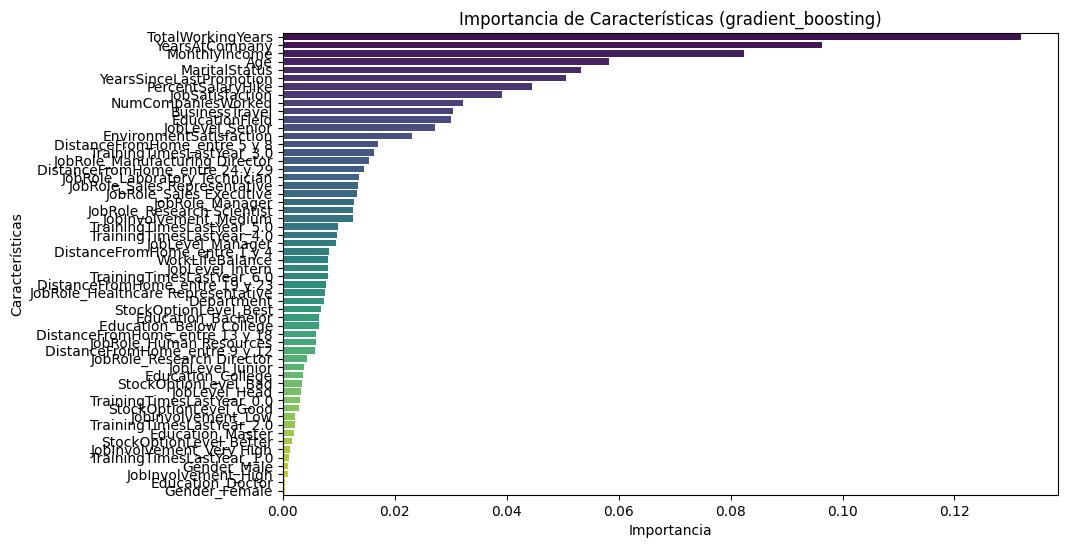

In [26]:
modelos_clasificacion.importancia_predictores("gradient_boosting")

### Modelo C

In [27]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.8)
modelos_clasificacion.ajustar_modelo("gradient_boosting", param_grid={'n_estimators': [170],
 'learning_rate': [0.01, 0.05, 0.1],
 'max_depth': [4, 5,6,10],
 'min_samples_split': [7,10,12],
 'min_samples_leaf': [4,5,6],
 'subsample': [0.8, 1.0]}, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos3/basura",nombre_modelo_guardar="modelo_gradient3C.pkl")

-------------------------------------------------
El mejor modelo es:
GradientBoostingClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=7,
                           n_estimators=170, random_state=42)
-------------------------------------------------
Los parametros actuales son:


{'n_estimators': [100, 200],
 'learning_rate': [0.01, 0.1, 0.2],
 'max_depth': [3, 4, 5],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'subsample': [0.8, 1.0]}

In [28]:
modelos_clasificacion.calcular_metricas(modelo_nombre="gradient_boosting").T

accuracy  precision  recall   f1  kappa  auc
train      1.00       1.00    1.00 1.00   1.00 1.00
test       0.88       0.89    0.88 0.88   0.76 0.92

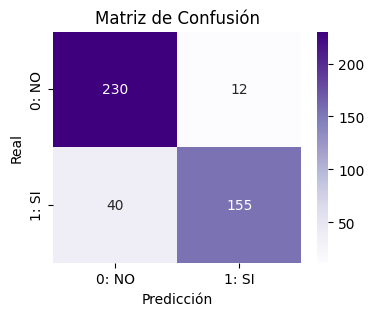

In [29]:
modelos_clasificacion.plot_matriz_confusion("gradient_boosting", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

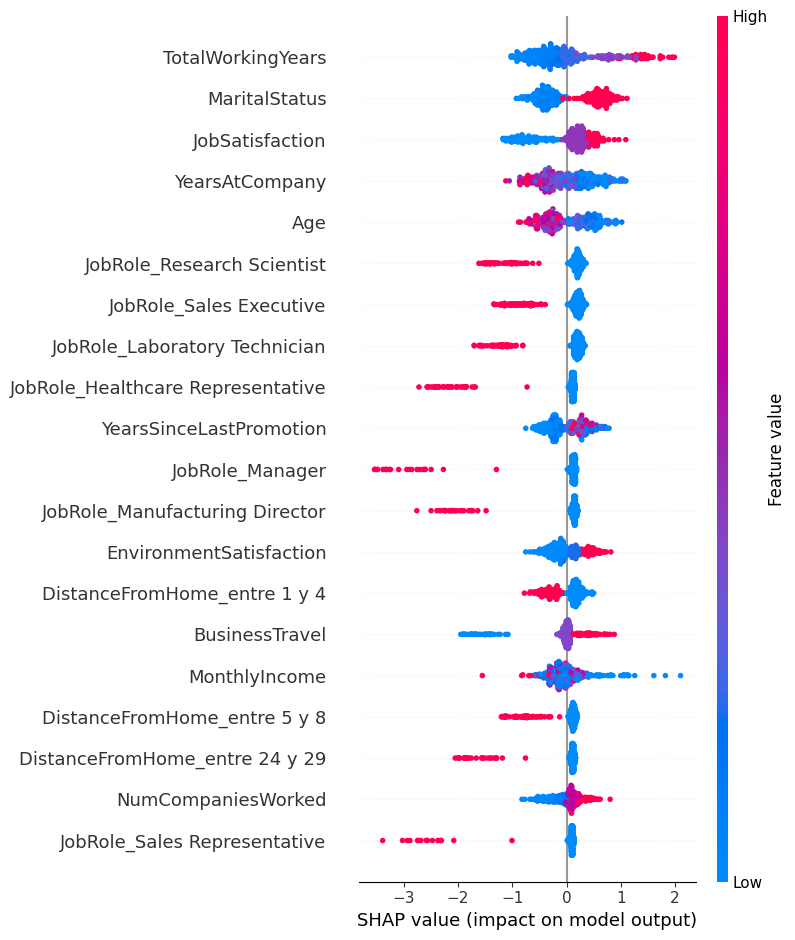

In [30]:
modelos_clasificacion.plot_shap_summary("gradient_boosting")

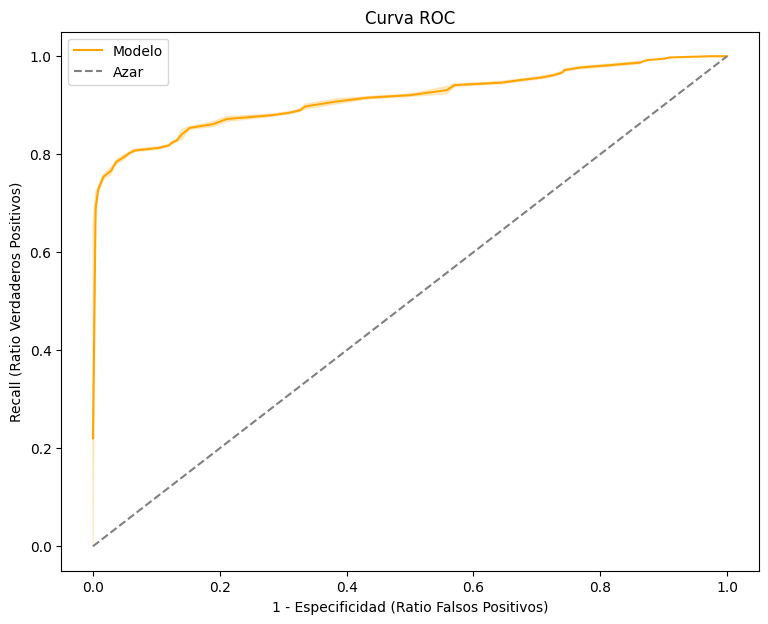

In [31]:
modelos_clasificacion.plot_curva_ROC( grafica_size = (9,7))

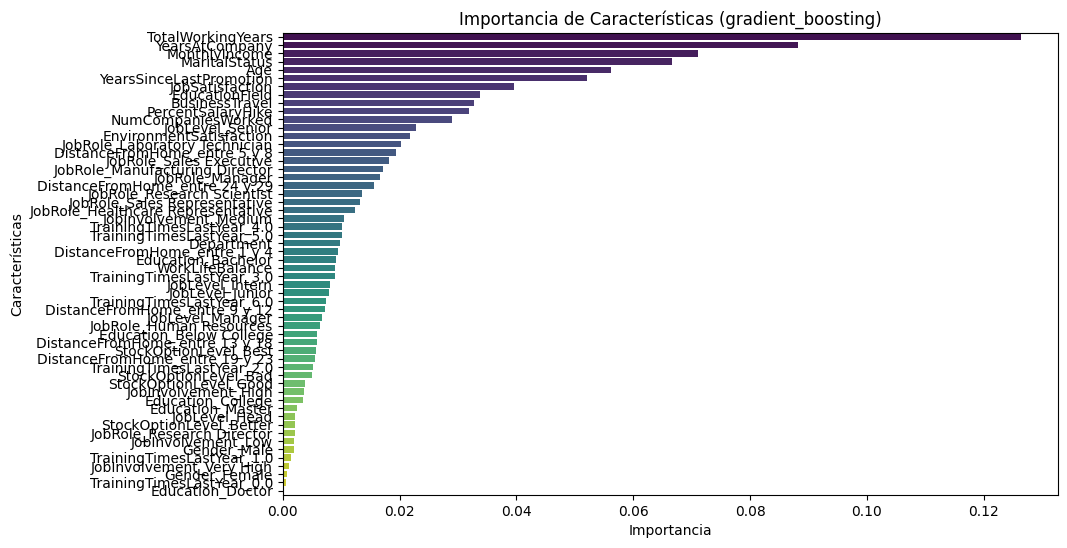

In [32]:
modelos_clasificacion.importancia_predictores("gradient_boosting")

### Modelo C.7


In [33]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.7)
modelos_clasificacion.ajustar_modelo("gradient_boosting", param_grid={'n_estimators': [170],
 'learning_rate': [0.01, 0.05, 0.1],
 'max_depth': [4, 5,6,10],
 'min_samples_split': [7,10,12],
 'min_samples_leaf': [4,5,6],
 'subsample': [0.8, 1.0]}, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos3/basura",nombre_modelo_guardar="modelo_gradient3.C.7.pkl")

-------------------------------------------------
El mejor modelo es:
GradientBoostingClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=7,
                           n_estimators=170, random_state=42)
-------------------------------------------------
Los parametros actuales son:


{'n_estimators': [100, 200],
 'learning_rate': [0.01, 0.1, 0.2],
 'max_depth': [3, 4, 5],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'subsample': [0.8, 1.0]}

In [34]:
modelos_clasificacion.calcular_metricas(modelo_nombre="gradient_boosting").T

accuracy  precision  recall   f1  kappa  auc
train      1.00       1.00    1.00 1.00   0.99 1.00
test       0.87       0.88    0.87 0.87   0.74 0.92

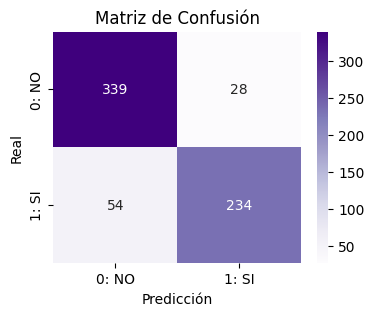

In [35]:
modelos_clasificacion.plot_matriz_confusion("gradient_boosting", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

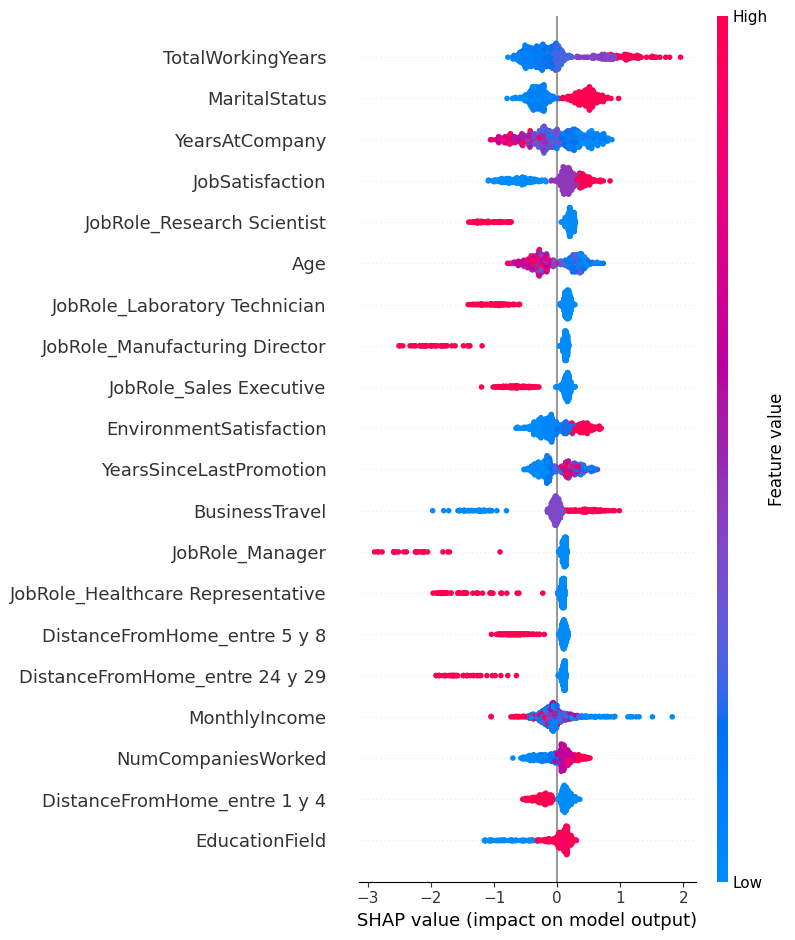

In [36]:
modelos_clasificacion.plot_shap_summary("gradient_boosting")

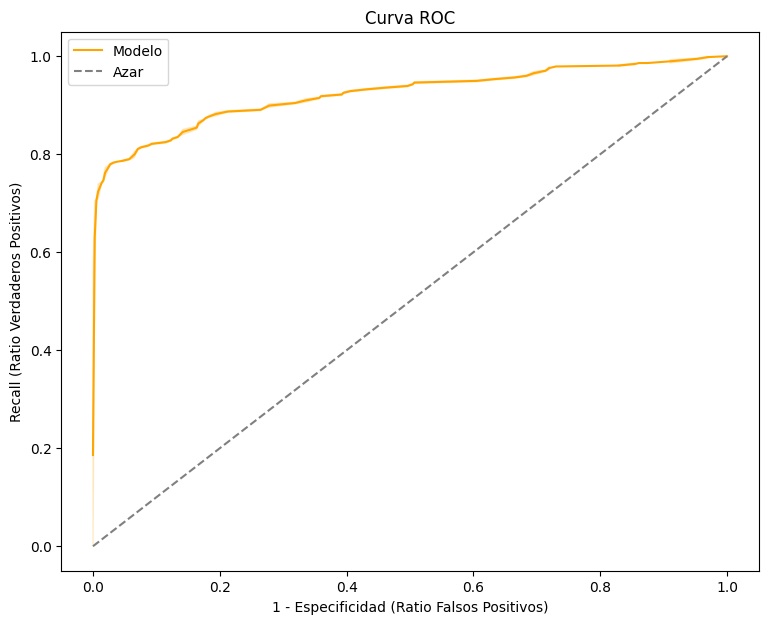

In [37]:
modelos_clasificacion.plot_curva_ROC( grafica_size = (9,7))

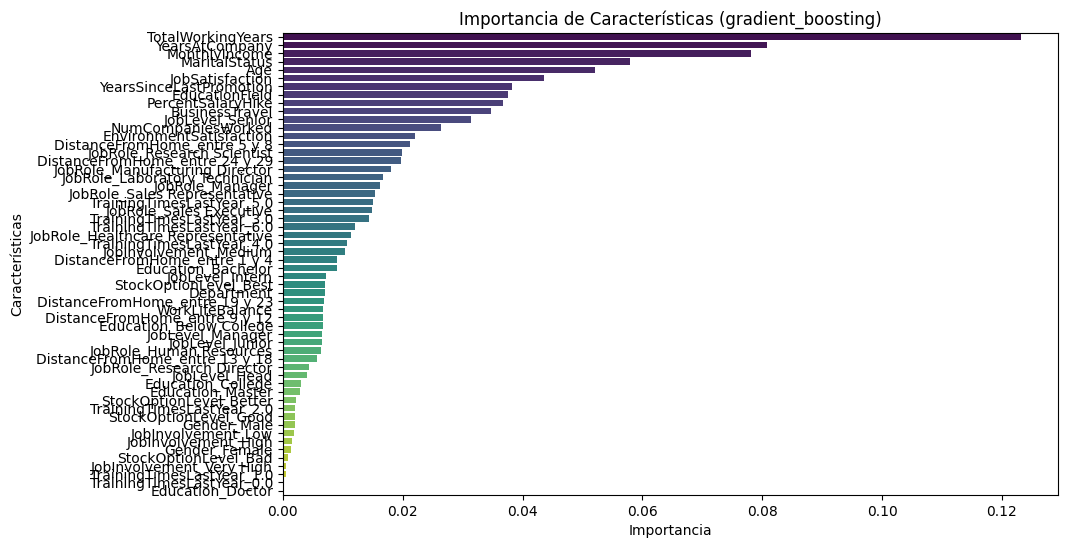

In [38]:
modelos_clasificacion.importancia_predictores("gradient_boosting")

### Modelo D

In [39]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.8)
modelos_clasificacion.ajustar_modelo("gradient_boosting", param_grid={'n_estimators': [160,170],
 'learning_rate': [0.01, 0.05, 0.1],
 'max_depth': [2, 4, 5],
 'min_samples_split': [11,12,14],
 'min_samples_leaf': [5],
 'subsample': [0.8, 1.0]}, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos3/basura",nombre_modelo_guardar="modelo_gradient3D.pkl")

-------------------------------------------------
El mejor modelo es:
GradientBoostingClassifier(max_depth=5, min_samples_leaf=5,
                           min_samples_split=12, n_estimators=160,
                           random_state=42)
-------------------------------------------------
Los parametros actuales son:


{'n_estimators': [100, 200],
 'learning_rate': [0.01, 0.1, 0.2],
 'max_depth': [3, 4, 5],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'subsample': [0.8, 1.0]}

In [40]:
modelos_clasificacion.calcular_metricas(modelo_nombre="gradient_boosting").T

accuracy  precision  recall   f1  kappa  auc
train      1.00       1.00    1.00 1.00   1.00 1.00
test       0.88       0.88    0.88 0.88   0.75 0.91

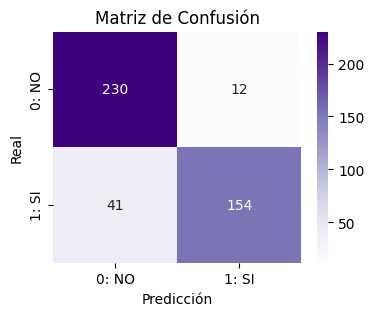

In [41]:
modelos_clasificacion.plot_matriz_confusion("gradient_boosting", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

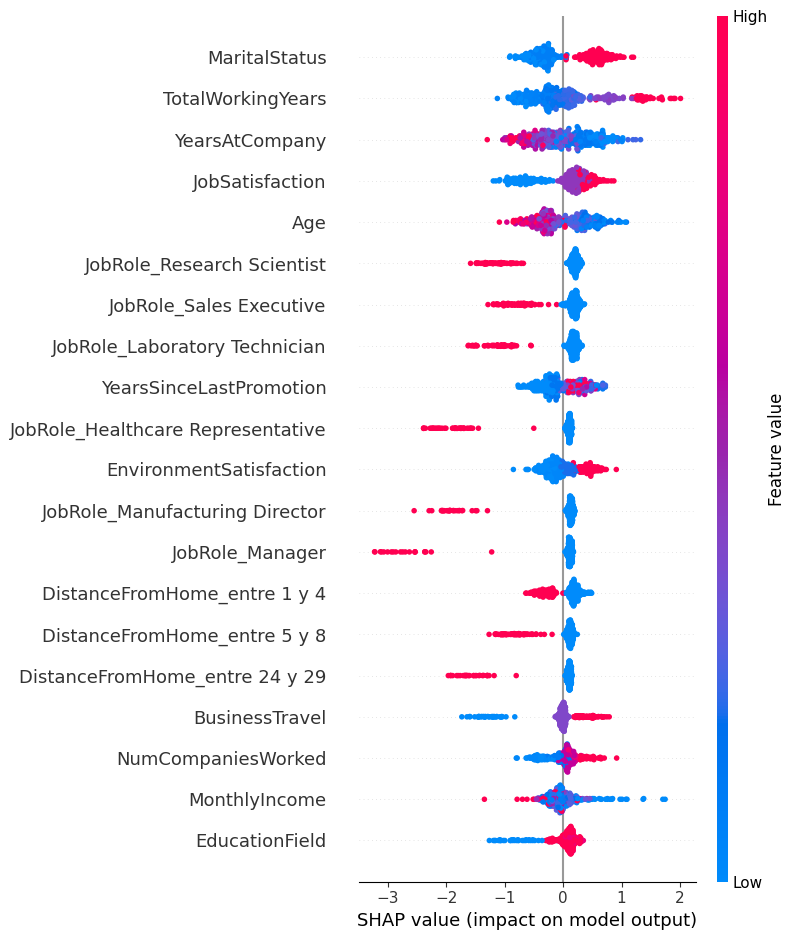

In [42]:
modelos_clasificacion.plot_shap_summary("gradient_boosting")

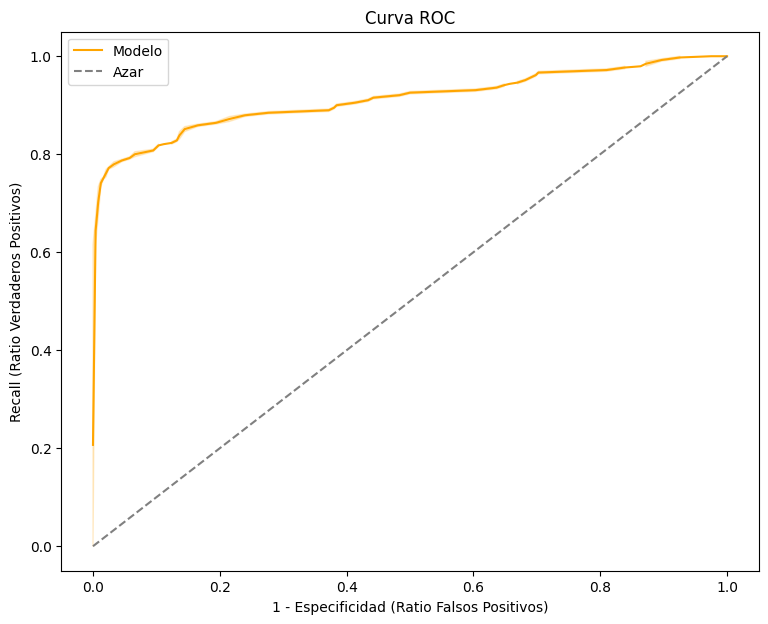

In [43]:
modelos_clasificacion.plot_curva_ROC( grafica_size = (9,7))

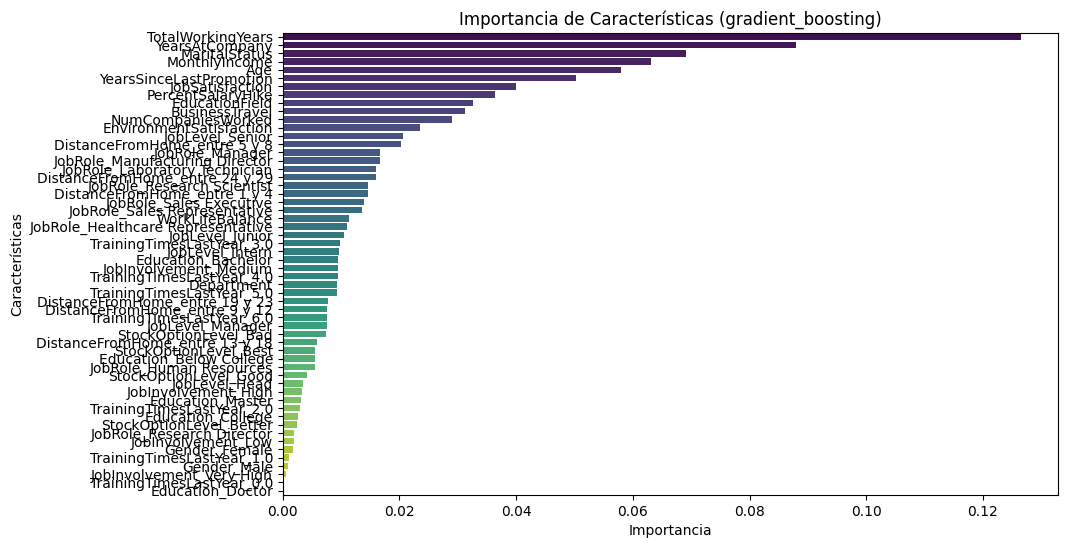

In [44]:
modelos_clasificacion.importancia_predictores("gradient_boosting")

### Modelo E

In [45]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.8)
modelos_clasificacion.ajustar_modelo("gradient_boosting", param_grid={'n_estimators': [160,170],
 'learning_rate': [0.01, 0.05, 0.1],
 'max_depth': [20],
 'min_samples_split': [11,12,14],
 'min_samples_leaf': [5],
 'subsample': [0.8, 1.0]}, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos3/basura",nombre_modelo_guardar="modelo_gradient3E.pkl")

-------------------------------------------------
El mejor modelo es:
GradientBoostingClassifier(learning_rate=0.05, max_depth=20, min_samples_leaf=5,
                           min_samples_split=12, n_estimators=160,
                           random_state=42)
-------------------------------------------------
Los parametros actuales son:


{'n_estimators': [100, 200],
 'learning_rate': [0.01, 0.1, 0.2],
 'max_depth': [3, 4, 5],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'subsample': [0.8, 1.0]}

In [46]:
modelos_clasificacion.calcular_metricas(modelo_nombre="gradient_boosting").T

accuracy  precision  recall   f1  kappa  auc
train      1.00       1.00    1.00 1.00   1.00 1.00
test       0.88       0.89    0.88 0.88   0.76 0.93

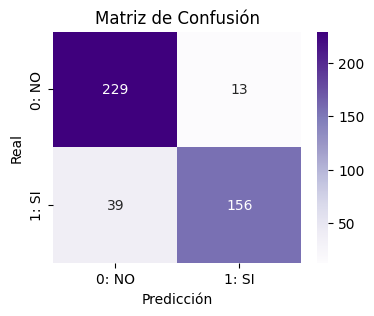

In [47]:
modelos_clasificacion.plot_matriz_confusion("gradient_boosting", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

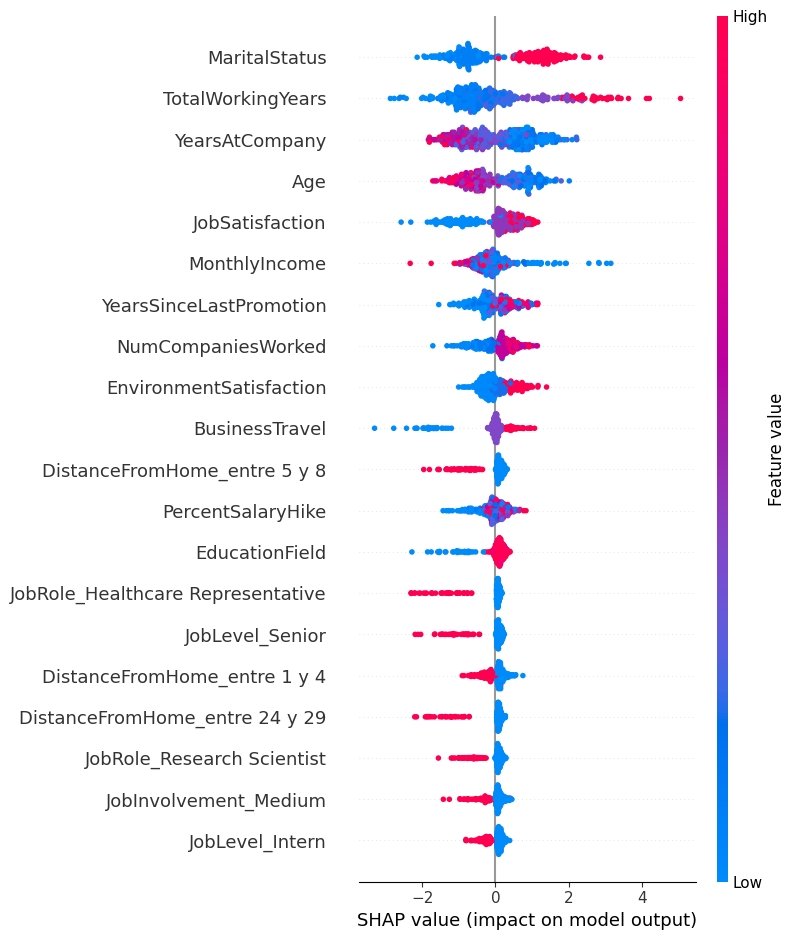

In [48]:
modelos_clasificacion.plot_shap_summary("gradient_boosting")

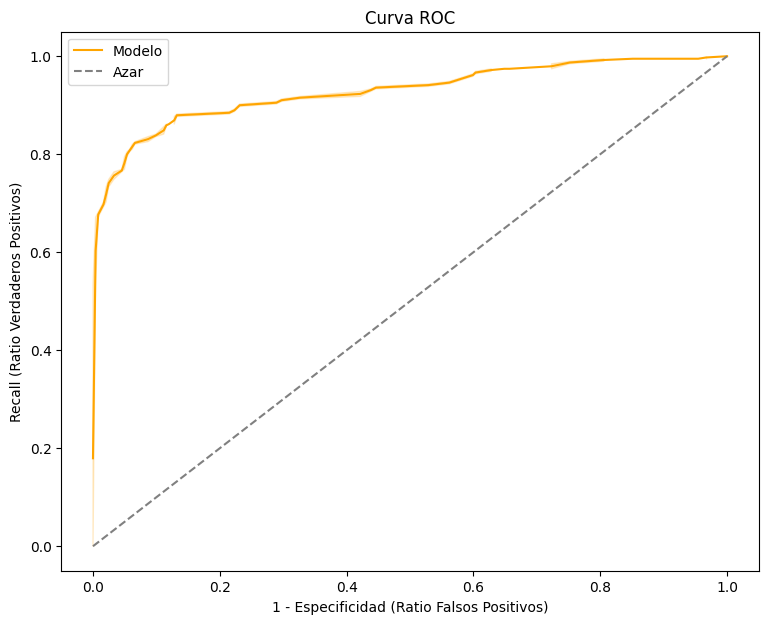

In [49]:
modelos_clasificacion.plot_curva_ROC( grafica_size = (9,7))

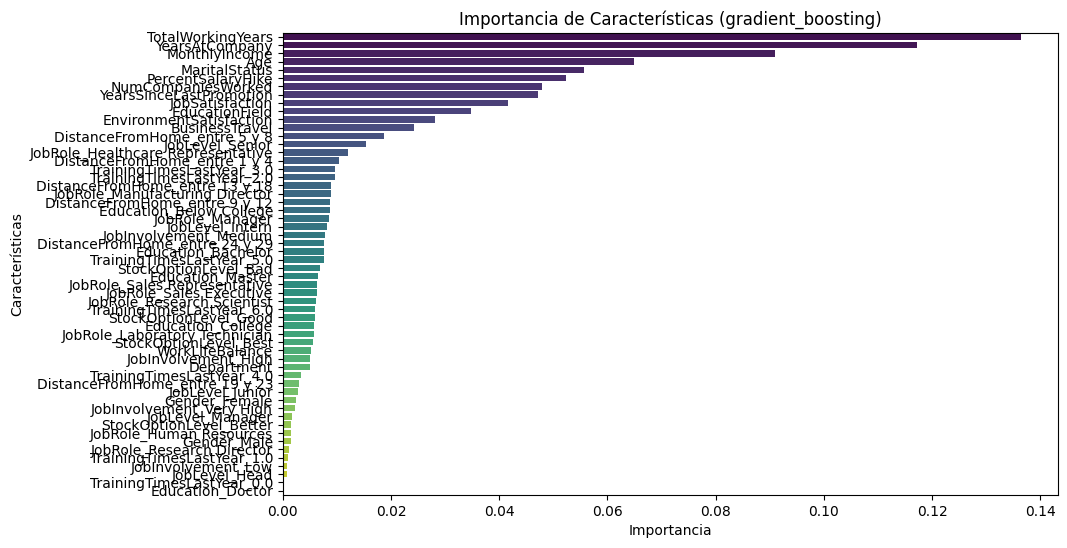

In [50]:
modelos_clasificacion.importancia_predictores("gradient_boosting")

### Modelo E.7

In [63]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.7)
modelos_clasificacion.ajustar_modelo("gradient_boosting", param_grid={'n_estimators': [160,170],
 'learning_rate': [0.01, 0.05, 0.1],
 'max_depth': [20],
 'min_samples_split': [11,12,14],
 'min_samples_leaf': [5],
 'subsample': [0.8, 1.0]}, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos3",nombre_modelo_guardar="modelo_gradient3.E.7.pkl")

-------------------------------------------------
El mejor modelo es:
GradientBoostingClassifier(learning_rate=0.05, max_depth=20, min_samples_leaf=5,
                           min_samples_split=12, n_estimators=170,
                           random_state=42, subsample=0.8)
-------------------------------------------------
Los parametros actuales son:


{'n_estimators': [100, 200],
 'learning_rate': [0.01, 0.1, 0.2],
 'max_depth': [3, 4, 5],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'subsample': [0.8, 1.0]}

In [64]:
modelos_clasificacion.calcular_metricas(modelo_nombre="gradient_boosting").T

accuracy  precision  recall   f1  kappa  auc
train      1.00       1.00    1.00 1.00   1.00 1.00
test       0.89       0.90    0.89 0.89   0.78 0.94

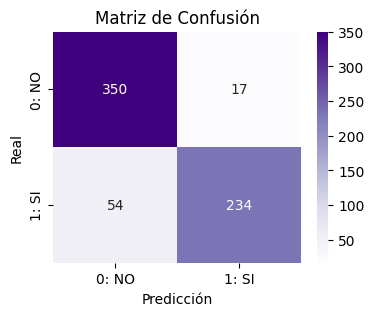

In [65]:
modelos_clasificacion.plot_matriz_confusion("gradient_boosting", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

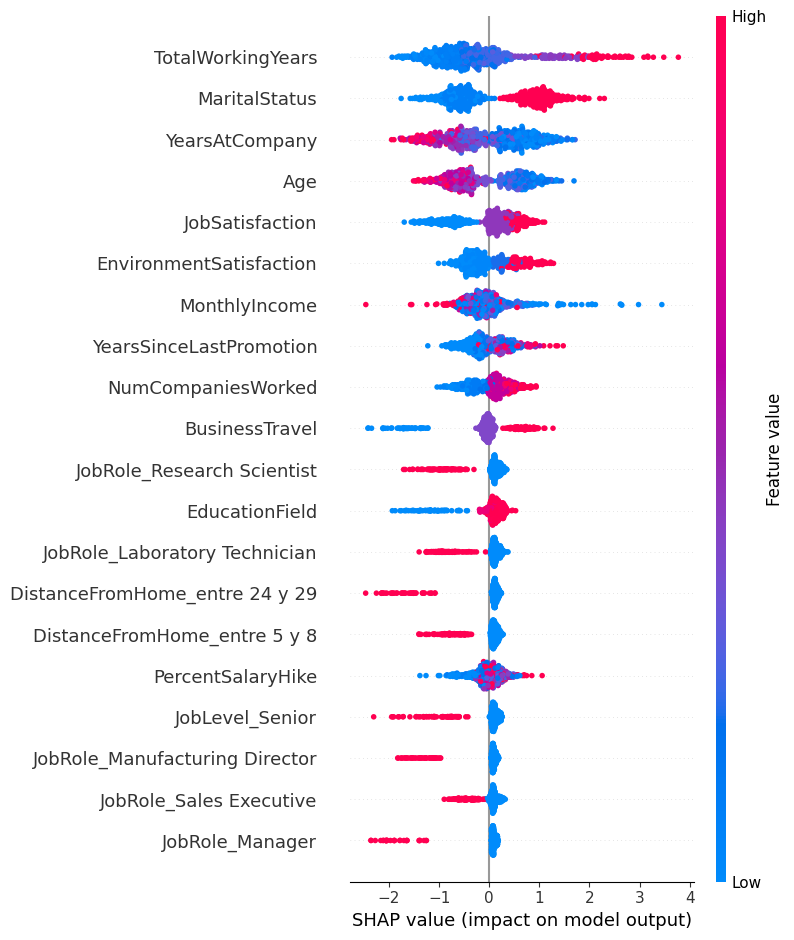

In [66]:
modelos_clasificacion.plot_shap_summary("gradient_boosting")

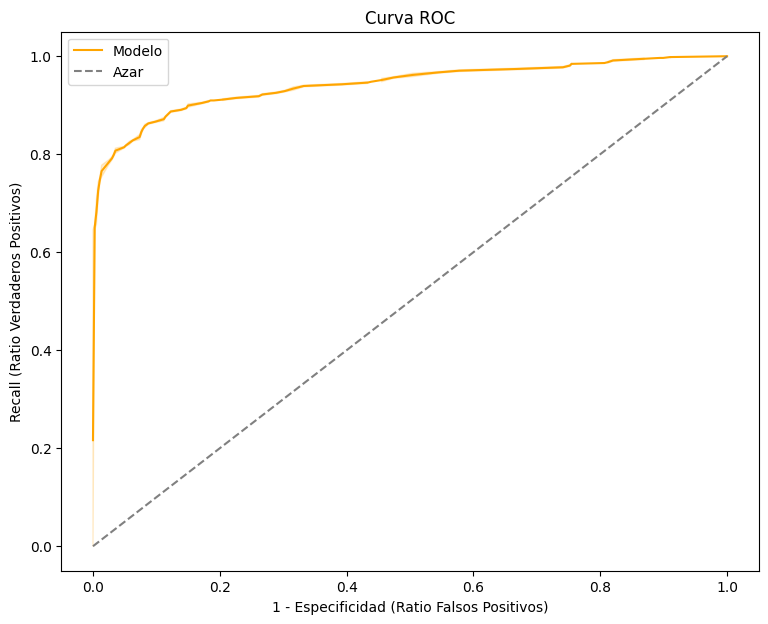

In [67]:
modelos_clasificacion.plot_curva_ROC( grafica_size = (9,7))

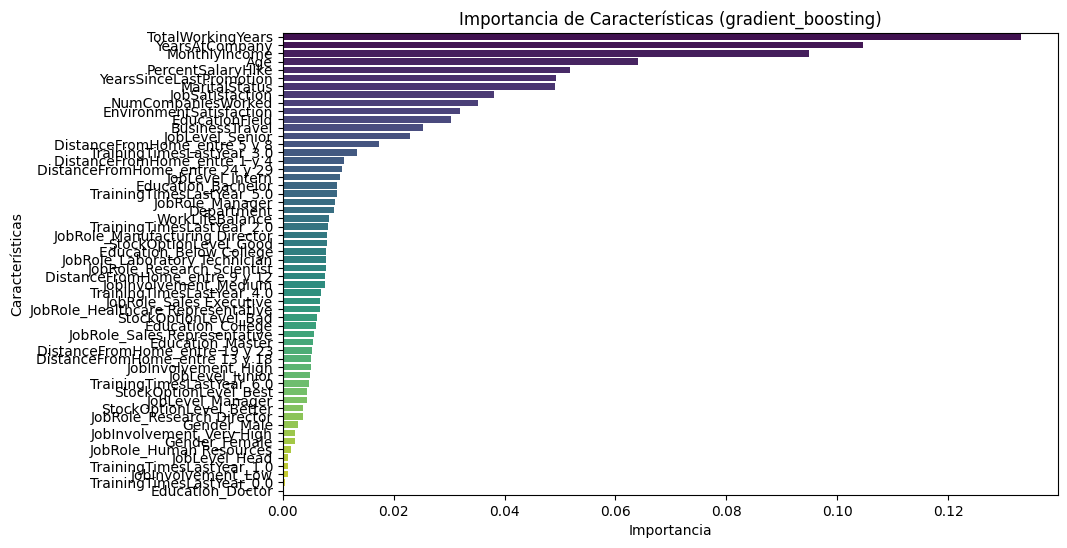

In [68]:
modelos_clasificacion.importancia_predictores("gradient_boosting")

### Modelo D.7

In [57]:
modelos_clasificacion=f.AnalisisModelosClasificacion(df_preprocesado, "Attrition",train_size=0.7)
modelos_clasificacion.ajustar_modelo("gradient_boosting", param_grid={'n_estimators': [160,170],
 'learning_rate': [0.01, 0.05, 0.1],
 'max_depth': [2, 4, 5],
 'min_samples_split': [11,12,14],
 'min_samples_leaf': [5],
 'subsample': [0.8, 1.0]}, cross_validation = 5,scoring="recall", ruta_guardar_modelo = "../../transformers/modelos3/basura",nombre_modelo_guardar="modelo_gradient3.D.7.pkl")

-------------------------------------------------
El mejor modelo es:
GradientBoostingClassifier(learning_rate=0.05, max_depth=5, min_samples_leaf=5,
                           min_samples_split=12, n_estimators=170,
                           random_state=42, subsample=0.8)
-------------------------------------------------
Los parametros actuales son:


{'n_estimators': [100, 200],
 'learning_rate': [0.01, 0.1, 0.2],
 'max_depth': [3, 4, 5],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'subsample': [0.8, 1.0]}

In [58]:
modelos_clasificacion.calcular_metricas(modelo_nombre="gradient_boosting").T

accuracy  precision  recall   f1  kappa  auc
train      0.99       0.99    0.99 0.99   0.98 1.00
test       0.88       0.89    0.88 0.88   0.76 0.93

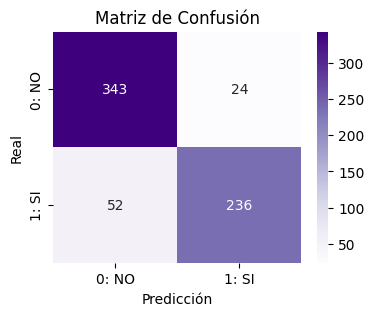

In [59]:
modelos_clasificacion.plot_matriz_confusion("gradient_boosting", invertir=False, tamano_grafica=(4, 3), labels=True, label0="NO", label1="SI")

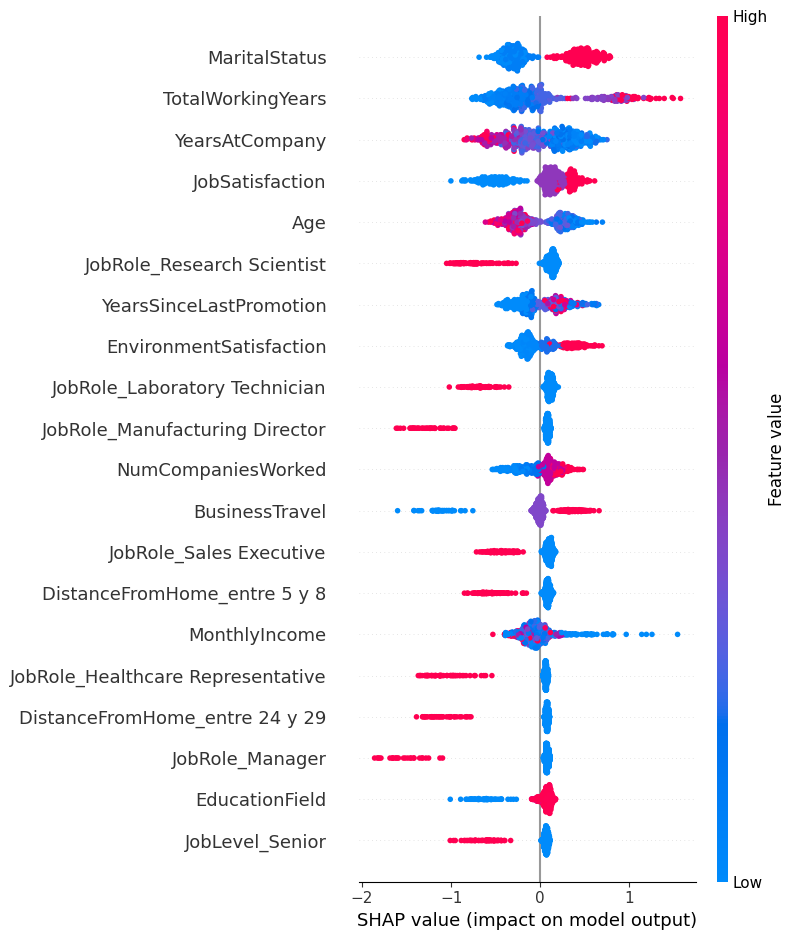

In [60]:
modelos_clasificacion.plot_shap_summary("gradient_boosting")

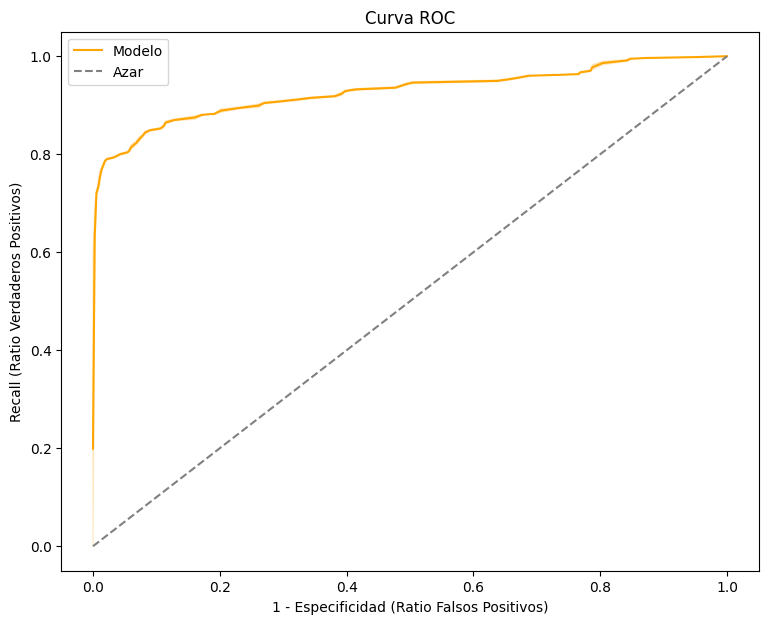

In [61]:
modelos_clasificacion.plot_curva_ROC( grafica_size = (9,7))

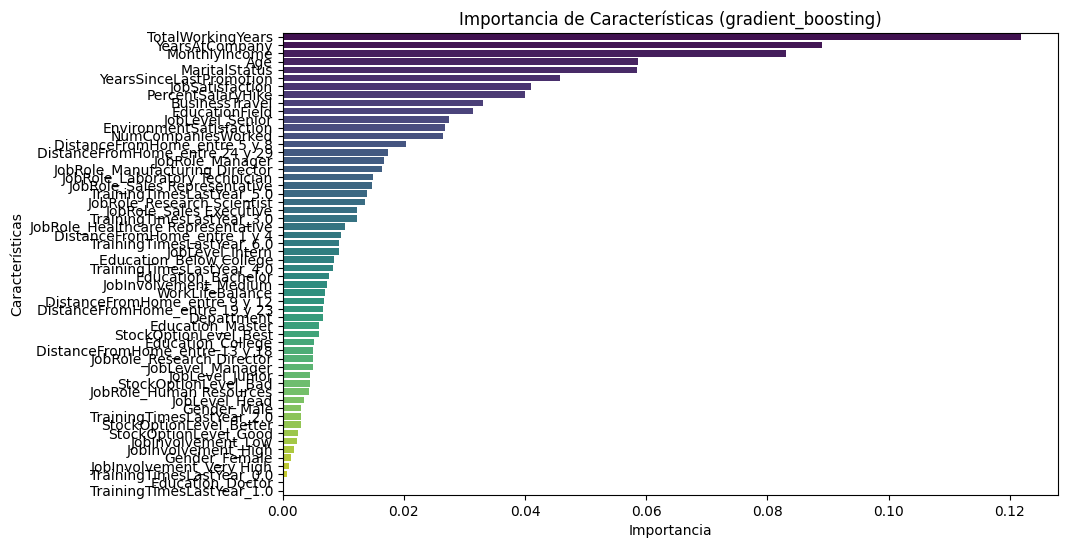

In [62]:
modelos_clasificacion.importancia_predictores("gradient_boosting")

| Modelo     | Diff Accuracy | Diff Precision | Diff Recall | Diff F1  | Recall Test | Kappa Test | AUC Test |
|------------|---------------|----------------|-------------|----------|-------------|------------|----------|
| **A**      | 0.11          | 0.10           | 0.11        | 0.11     | 0.89        | 0.77       | 0.91     |
| **A.7**    | 0.12          | 0.12           | 0.12        | 0.12     | 0.88        | 0.76       | 0.93     |
| **B**      | 0.12          | 0.12           | 0.12        | 0.12     | 0.88        | 0.75       | 0.91     |
| **B.7**    | 0.11          | 0.11           | 0.11        | 0.11     | 0.89        | 0.77       | 0.94     |
| **C**      | 0.12          | 0.11           | 0.12        | 0.12     | 0.88        | 0.76       | 0.92     |
| **C.7**    | 0.13          | 0.12           | 0.13        | 0.13     | 0.87        | 0.74       | 0.92     |
| **D**      | 0.12          | 0.12           | 0.12        | 0.12     | 0.88        | 0.75       | 0.91     |
| **D.7**    | 0.11          | 0.10           | 0.11        | 0.11     | 0.88        | 0.76       | 0.93     |
| **E**      | 0.12          | 0.11           | 0.12        | 0.12     | 0.88        | 0.76       | 0.93     |
| **E.7**    | 0.11          | 0.10           | 0.11        | 0.11     | 0.89        | 0.78       | 0.94     |


### Conclusion de mejor Gradient:  
  

*Tras observar todas las métricas de los modelos me cuestiono si usar el modelo B.7 o el modelo C.7*       
  
**Primera opción (equilibrio general): Modelo E.7**  

Es la opción perfecta entre balanceo de bajo Over fitting, alto recall y alto kappa

**Segunda opción (si quiero priorizar Kappa): Modelo B.7**  
Tiene un poco más over fitting (algo ínfimo)

#### ***Bajo mi criterio, prefiero el modelo E.7***  
